<a href="https://colab.research.google.com/github/fadi-theodory/Machine-learning/blob/main/Project_4_Part_2_(Core)_Adult_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Adult income

> By Fadi Theodory

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wenruliu/adult-income-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/adult-income-dataset


In [3]:
import pandas as pd

df = pd.read_csv(path + "/adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


1. What is the target? (You are required to complete a classification task for this project)

>the target is the income
2. What does one row represent? (A person? A business? An event? A product?)
>Each row represents a person

3. How many features does the data have?
>14 features
4. How many rows are in the dataset?
>48,842
5. What opportunities exist for dimensionality reduction or feature selection with this dataset?

6. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?


## Imbalanced target

In [5]:
df['income'].value_counts(normalize=True)

,proportion
income,
<=50K,0.760718
>50K,0.239282


## Data cleaning

In [6]:
df.isna().sum().sum()

np.int64(0)

In [7]:
df.duplicated().sum()

np.int64(52)

In [8]:
# to drop duplicated rows
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
# to check concisitency of object columns with a for loop

cat_cols=df.select_dtypes(include='object')
for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print ("\n")

workclass
workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


education
education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64


marital-status
marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count, dtype: int64


occupation
occupation
Prof-specialty       

In [11]:
import numpy as np
# to remove ? from workclass and replace it with nothing
df['workclass'] = df['workclass'].replace('?', np.nan)
df['workclass'].value_counts()

,count
workclass,
Private,33860
Self-emp-not-inc,3861
Local-gov,3136
State-gov,1981
Self-emp-inc,1694
Federal-gov,1432
Without-pay,21
Never-worked,10


In [12]:
# to change in occupation occupation the ? with nothing then fill it with NA
df['occupation'] = df['occupation'].replace('?', np.nan)
df['occupation'].value_counts()

,count
occupation,
Prof-specialty,6165
Craft-repair,6102
Exec-managerial,6082
Adm-clerical,5606
Sales,5501
Other-service,4919
Machine-op-inspct,3017
Transport-moving,2355
Handlers-cleaners,2071


In [13]:
df['native-country'] = df['native-country'].replace('?', np.nan)
df['native-country'].value_counts()

,count
native-country,
United-States,43792
Mexico,943
Philippines,294
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151
Cuba,138


In [14]:
# to make a for loop to check inconsistancies in numerical columns
num_cols=df.select_dtypes(include='number').columns
for col in num_cols:
    print(col)
    print(df[col].describe())
    print ("\n")

age
count    48790.000000
mean        38.652798
std         13.708493
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


fnlwgt
count    4.879000e+04
mean     1.896690e+05
std      1.056172e+05
min      1.228500e+04
25%      1.175550e+05
50%      1.781385e+05
75%      2.376062e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64


educational-num
count    48790.000000
mean        10.078807
std          2.570046
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: educational-num, dtype: float64


capital-gain
count    48790.000000
mean      1080.217688
std       7455.905921
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64


capital-loss
count    48790.000000
mean        87.595573
std        403.209129
min          0.000000
25%          0.0000

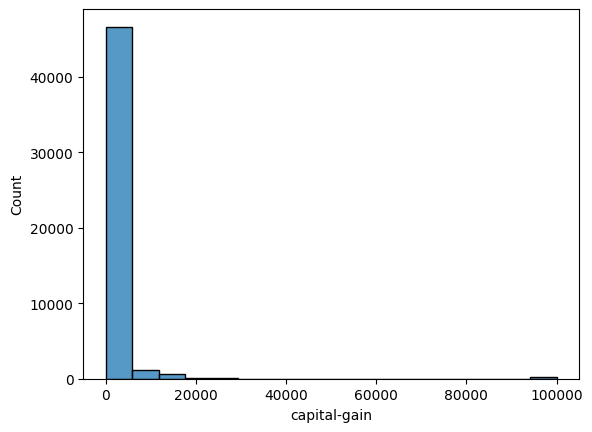

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
# to visulize capital gain using histogram
sns.histplot(df['capital-gain'])
plt.show()

In [16]:
# to take a look on the capital gain that is bigger than 40000
df[df['capital-gain']==99999]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
83,44,Self-emp-inc,223881,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,NaN,>50K
346,39,Private,198654,HS-grad,9,Divorced,Exec-managerial,Unmarried,Black,Female,99999,0,40,United-States,>50K
357,50,Self-emp-not-inc,165001,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,80,United-States,>50K
418,54,Self-emp-inc,159219,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,40,United-States,>50K
692,41,Private,191547,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48109,47,Private,155664,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
48253,43,Self-emp-inc,62026,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K
48371,66,Private,115498,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,NaN,>50K
48519,47,Private,294913,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K


In [17]:
df['capital-gain'].value_counts()

,count
capital-gain,
0,44755
15024,513
7688,410
7298,364
99999,244
...,...
6612,1
1111,1
22040,1


> There are 244 whi gained 99,999. since it is capital gain, maybe someone got lucky and gained this amount. it is an outlier but might be tru

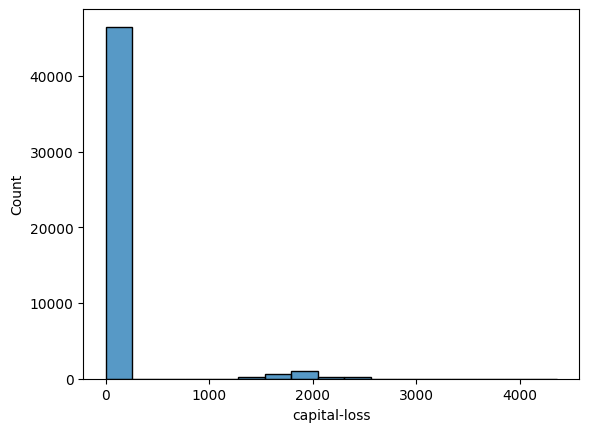

In [18]:
# to visulize capital loss using histogram
sns.histplot(df['capital-loss'])
plt.show()

> it is very probable

In [19]:
# to check hours per week
df['hours-per-week'].describe()

,hours-per-week
count,48790.000000
mean,40.425886
std,12.392729
min,1.000000
25%,40.000000
50%,40.000000
75%,45.000000
max,99.000000


In [20]:
# to check the rows that has hours more than 50
df[df['hours-per-week']>60]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
25,45,Self-emp-not-inc,432824,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,90,United-States,>50K
248,47,Private,212944,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,>50K
270,25,Private,177221,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,75,United-States,<=50K
309,51,Self-emp-not-inc,136708,HS-grad,9,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,3103,0,84,Vietnam,<=50K
338,36,Self-emp-inc,48063,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,80,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48750,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,NaN,<=50K
48757,35,Private,30673,12th,8,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,84,United-States,<=50K
48776,26,Private,179010,Some-college,10,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,<=50K
48801,27,Private,177398,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,64,United-States,<=50K


> although working 99 hours per week or around that is a lot, but it means 14 hours per day. It is probable

In [21]:
df.isna().sum().sum()

np.int64(6456)

## Exploring the data

In [22]:
# to draw a correlation map
corr = df.corr(numeric_only = True)
corr.round(2)


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.00,-0.08,0.03,0.08,0.06,0.07
fnlwgt,-0.08,1.00,-0.04,-0.00,-0.00,-0.01
educational-num,0.03,-0.04,1.00,0.13,0.08,0.14
capital-gain,0.08,-0.00,0.13,1.00,-0.03,0.08
capital-loss,0.06,-0.00,0.08,-0.03,1.00,0.05
hours-per-week,0.07,-0.01,0.14,0.08,0.05,1.00


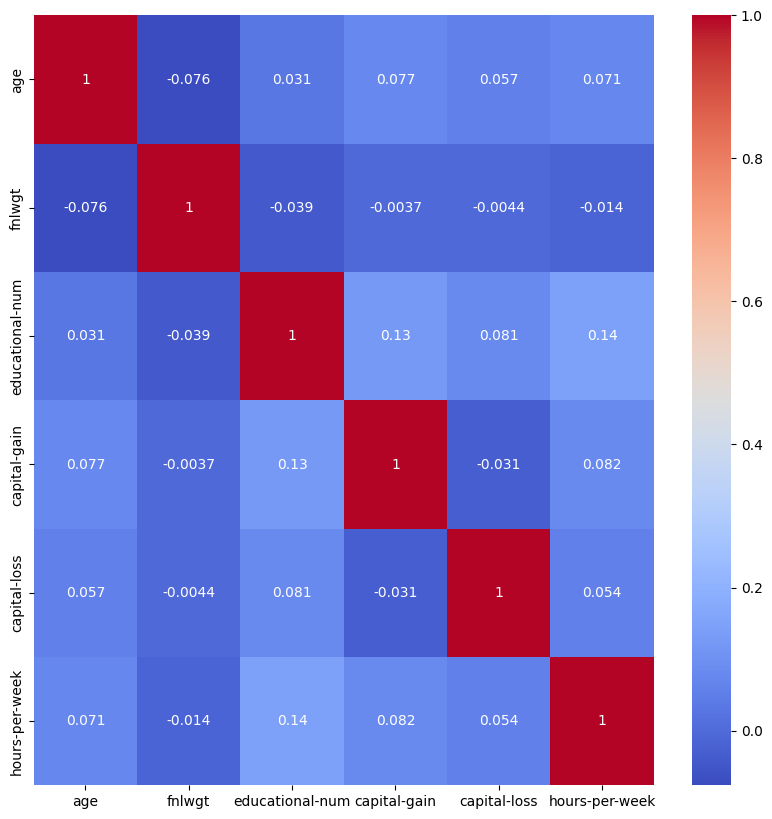

In [23]:
# Create a fig, ax with a figsize argument
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, ax=ax);



> the numerical features are with very weak correlation

In [24]:
def plot_numeric_vs_target(df, x, y, figsize=(6,4),
                           target_type='reg', estimator='mean',
                           errorbar='ci',sorted=False,ascending=False,
                           **kwargs): # kwargs for sns.regplot

  nulls = df[[x,y]].isna().sum()
  if nulls.sum()>0:
    print(f"- Excluding {nulls.sum()} NaN's")
    # print(nulls)
    temp_df = df.dropna(subset=[x,y,])
  else:
    temp_df = df
  # Create the figure
  fig, ax = plt.subplots(figsize=figsize)

  # REGRESSION-TARGET PLOT
  if 'reg' in target_type:
    # Calculate the correlation
    corr = df[[x,y]].corr().round(2)
    r = corr.loc[x,y]
    # Plot the data
    scatter_kws={'ec':'white','lw':1,'alpha':0.8}
    sns.regplot(data=temp_df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
    ## Add the title with the correlation
    ax.set_title(f"{x} vs. {y} (r = {r})")

  # CLASSIFICATION-TARGET PLOT
  elif 'class' in target_type:

    # Sort the groups by median/mean
    if sorted == True:

      if estimator == 'median':
        group_vals = temp_df.groupby(y)[x].median()
      elif estimator =='mean':
        group_vals = temp_df.groupby(y)[x].mean()

      ## Sort values
      group_vals = group_vals.sort_values(ascending=ascending)
      order = group_vals.index

    else:
      # Set order to None if not calcualted
      order = None


    # Left Subplot (barplot)
    sns.barplot(data=temp_df, x=y, y=x, order=order,  estimator=estimator,
                errorbar=errorbar, ax=ax, **kwargs)

    # Add title
    ax.set_title(f"{x} vs. {y}")

    # rotate xaxis labels
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


  # Final Adjustments & return
  fig.tight_layout()
  fig.show()
  return fig, ax


In [25]:
def plot_categorical_vs_target(df, x, y, figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None, target_type='reg'):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)
  # REGRESSION-TARGET PLOT
  if target_type=='reg': #Added if statement here
    # Barplot
    sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
                linewidth=1, edgecolor='black', errorbar=None)
    # Boxplot
    sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                  order=order, hue_order=order, legend=False,
                  edgecolor='white', linewidth=0.5,
                  size=3,zorder=0)
  # CLASSIFICATION-TARGET PLOT # This is the new code for the classification task
  elif target_type=='class':
    ax = sns.histplot(data=temp_df, hue=y, x=x, stat='percent',  multiple='fill')
  # Rotate xlabels
  ax.set_xticks(ax.get_xticks()) # Added this to prevent a bug
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax


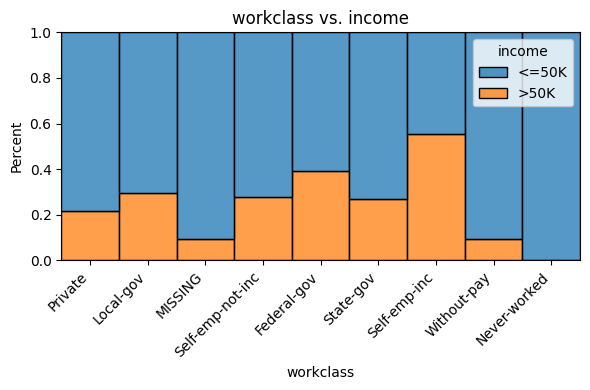

In [26]:
# to check work class against  income
plot_categorical_vs_target(df,"workclass","income",target_type="class");

> we can see that self emp inc have the highest percentage.

> who never worked will not logically have >50k

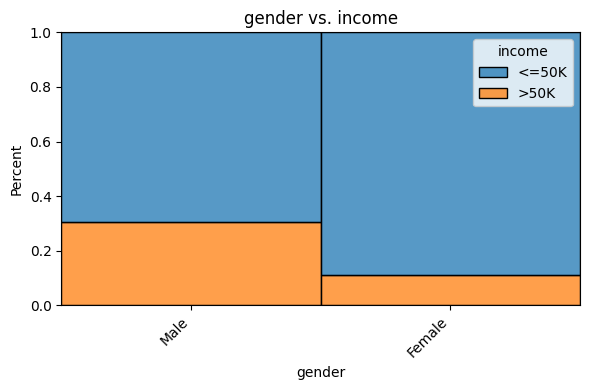

In [27]:
# to check gender against  income
plot_categorical_vs_target(df,"gender","income",target_type="class");

Males have higher income

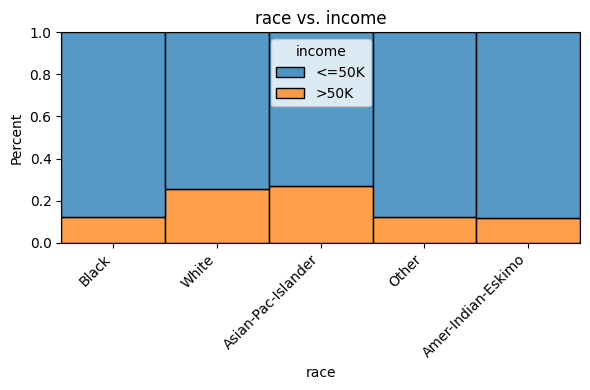

In [28]:
# to check race country against  income
plot_categorical_vs_target(df,'race',"income",target_type="class");

we can see that asian pac islander have the highest percentage
then whites are less by a little bit

## Preprocessing

In [29]:
# to assign y as income and X all others
y=df['income']
X=df.drop(columns='income')
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States


In [30]:
num_cols.isna().sum()

np.int64(0)

In [31]:
# split test train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [32]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# Categorical Preprocessing Pipeline
# Save list of column names
ohe_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "Missing")
ohe_encoder = OneHotEncoder(drop = 'if_binary',sparse_output=False)
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)


# Numerical Prepprocessing Pipeline
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
# impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)

# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ohe_tuple], verbose_feature_names_out=False)
preprocessor



OneHotEncoder Columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')
Numeric Columns: Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False))]),
                                 Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [33]:
preprocessor.fit(X_train)
X_train_tf = preprocessor.transform(X_train)
X_test_tf = preprocessor.transform(X_test)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_tf, y_train)

In [34]:
feature_names = preprocessor.get_feature_names_out()
X_train_sm_df = pd.DataFrame(X_train_sm, columns=feature_names)
X_test_df = pd.DataFrame(X_test_tf, columns=feature_names, index=X_test.index)


## Modeling

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOT
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray',colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap,colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  fig.tight_layout()
  plt.show()
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict


In [36]:
# to apply random forest over the
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_sm_df, y_train_sm)

RandomForestClassifier(random_state=42)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     27841
        >50K       1.00      1.00      1.00     27841

    accuracy                           1.00     55682
   macro avg       1.00      1.00      1.00     55682
weighted avg       1.00      1.00      1.00     55682



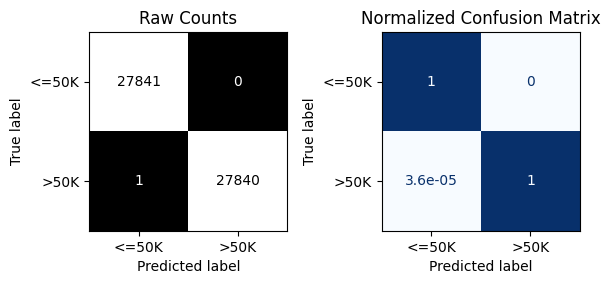


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.90      0.90      0.90      9268
        >50K       0.68      0.69      0.68      2930

    accuracy                           0.85     12198
   macro avg       0.79      0.79      0.79     12198
weighted avg       0.85      0.85      0.85     12198



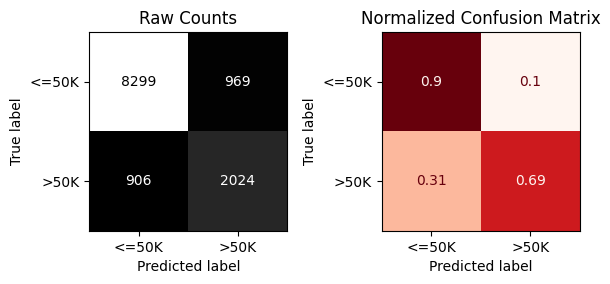

In [37]:
evaluate_classification(rf_clf, X_train_sm_df, y_train_sm, X_test_df, y_test, output_dict=True);

### Visualizing Premuation importance

the following code worked once and gave results, but for a long time, so i tried to use n_repeats =2. but it also took a long time. so i skipped it and took the previous results. the impportant thing is the idea  :)

In [38]:
from sklearn.inspection import permutation_importance
# we wil use n_repeats = 3 instead of 5 becauae 5 took a lot of time
r = permutation_importance(rf_clf, X_train_sm_df, y_train_sm ,n_repeats =2, random_state = 42)


KeyboardInterrupt: 

In [39]:
r.keys()

NameError: name 'r' is not defined

In [40]:
## can make the mean importances into a series
perm_importances = pd.Series(r['importances_mean'],index=X_train_sm_df.columns,
                           name = 'permutation importance')
perm_importances.head()

NameError: name 'r' is not defined

In [41]:
ax = perm_importances.sort_values().tail(10).plot(kind='barh',figsize=(4,6))
ax.set(ylabel='Feature Name',xlabel='Permutation Importance',
       title='Top 10 Most Important Features: Permutation Importance');



NameError: name 'perm_importances' is not defined

> It seems that the important features do make sense
---

## Explanatory Visualizations for the most important features

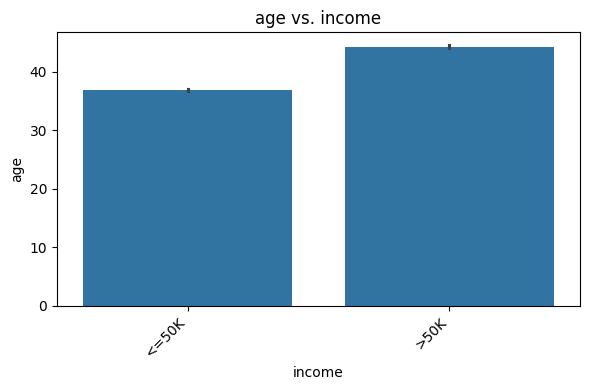

In [42]:
plot_numeric_vs_target(df,'age','income',target_type='class');

> Average of people earning less than 50 K is around 37.
> while average of people earning more than 50K, is around 45. this means that the age correlates positively to the income

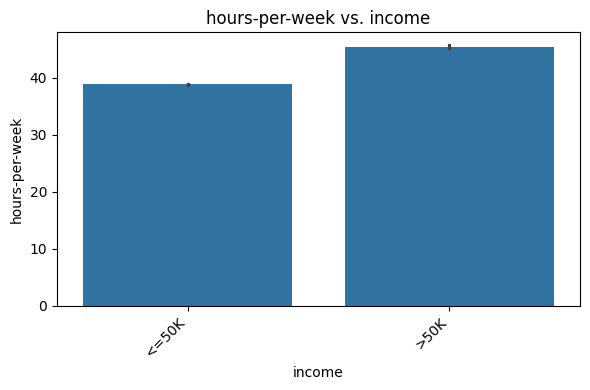

In [43]:
plot_numeric_vs_target(df,'hours-per-week','income',target_type='class');

> the average hours per week for people who earns more than 50K is 45.
> the average hours per week for people who earns less than 50K is 39 . eaning that the more hours per week, the higher income

# Part 2

## Apply PCA

In [44]:
# Instantiate PCA to make 3 principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
# Fit PCA to the training
pca.fit(X_train_sm_df)
# Transform the training and test data
X_train_pca = pca.transform(X_train_sm_df)
X_test_pca = pca.transform(X_test_df)

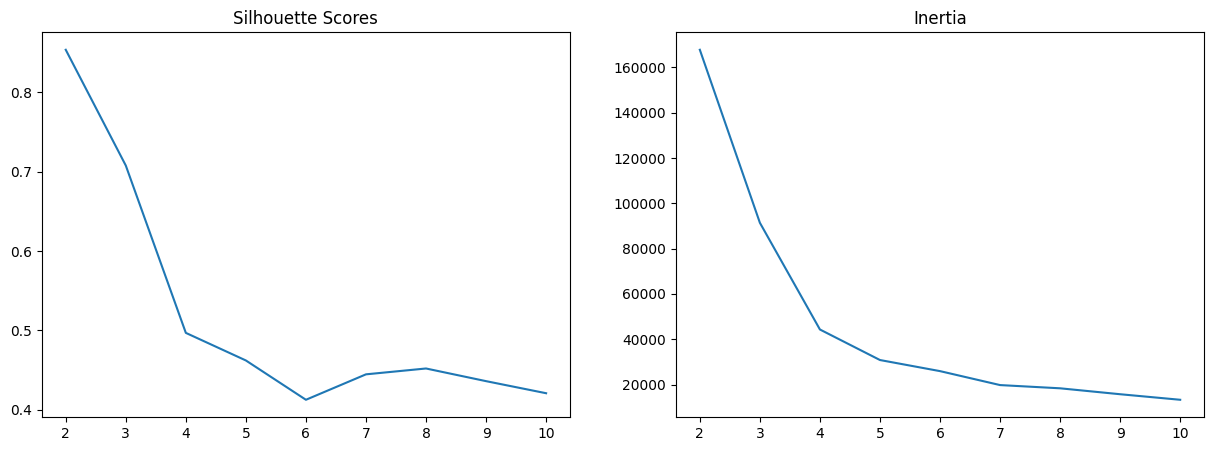

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
  kmeans.fit(X_train_pca )
  sils.append(silhouette_score(X_train_pca, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);


> silhouette score is 2,, inertia is 4, we will use the middle, three clusters

In [49]:
# to apply K means clustering to X_train_pca
kmeans = KMeans(n_clusters=3, n_init= 'auto', random_state=42)
kmeans.fit(X_train_pca)
# Convert the PCA results to DataFrames
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)
# Add the clusters as a column in the dataframe
X_train_pca['cluster'] = kmeans.labels_

X_train_pca

,0,1,2,cluster
0,-0.407256,-0.357148,-0.187590,0
1,0.173405,0.481665,-0.968925,0
2,-0.114193,-0.616112,0.404123,0
3,-1.051698,-1.542809,1.559195,0
4,-0.600165,-0.763636,0.152611,0
...,...,...,...,...
55677,-0.450725,-0.429691,0.055846,0
55678,0.323960,4.707125,1.499684,2
55679,-0.243690,-0.055193,-0.811002,0
55680,0.389242,-0.457157,-0.190335,0
